In [5]:
import tensorflow as tf
import numpy as np
import os


BATCH_SIZE = 64
BUFFER_SIZE = 1000

print("Downloading MNIST data...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")


train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_ds = val_ds.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

print("Data pipeline ready.")

Training samples: 60000
Test samples: 10000
Data pipeline ready.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model built.")

Model built.


In [7]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.8865 - loss: 0.3876 - val_accuracy: 0.9825 - val_loss: 0.0537
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9833 - loss: 0.0547 - val_accuracy: 0.9847 - val_loss: 0.0414
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9846 - val_loss: 0.0414
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.9923 - loss: 0.0257 - val_accuracy: 0.9862 - val_loss: 0.0405
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9867 - val_loss: 0.0400


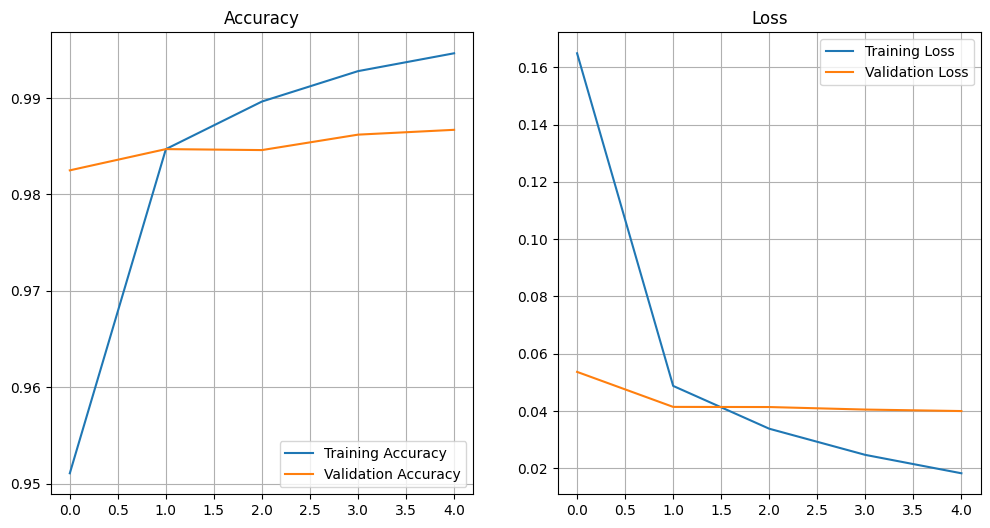

Running prediction check on 9 random images...


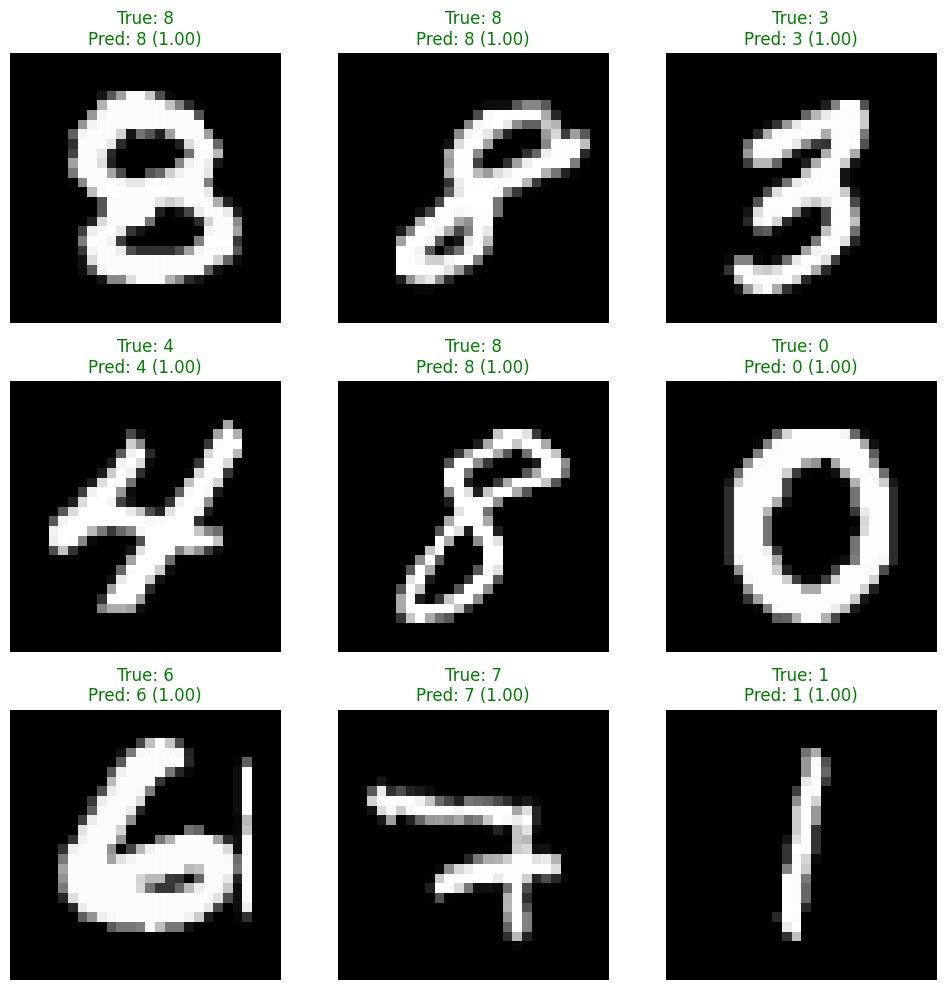

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved and downloading...


In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
import random

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.grid(True)
plt.show()

print("Running prediction check on 9 random images...")
plt.figure(figsize=(10, 10))


indices = random.sample(range(len(x_test)), 9)

for i, idx in enumerate(indices):
    image = x_test[idx]
    true_label = y_test[idx]

    # Predict
    input_img = np.expand_dims(image, axis=0)
    prediction = model.predict(input_img, verbose=0)
    pred_label = np.argmax(prediction)
    confidence = np.max(prediction)

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(3, 3, i + 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.2f})", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Save and download
model.save("digit.h5")
files.download("digit.h5")
print("Model saved and downloading...")